In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

image_path = r"D:\Datasets\Color Compensation\Gamut_Scan_rid.bmp" 
#r"D:\Datasets\LinescanCS\Hutamaki\NO_FILTER\green_cropped.bmp" 

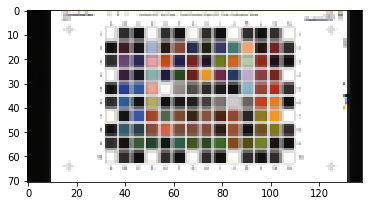

In [2]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

scale_percent = 10/100 # percent of original size
width = int(img.shape[1] * scale_percent)
height = int(img.shape[0] * scale_percent)
dim = (width, height)
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

plt.imshow(img)
plt.show()

In [3]:
# Reshape and Normalize
pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

## RGB

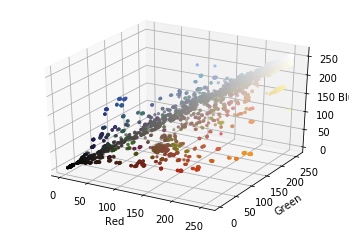

In [4]:
r, g, b = cv2.split(img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

# Plot
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

# HSV

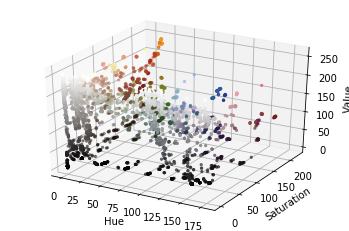

In [5]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

# Lab

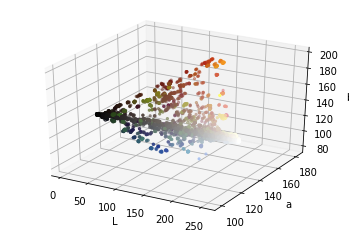

In [6]:
lab_img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

l, a, b = cv2.split(lab_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(l.flatten(), a.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("L")
axis.set_ylabel("a")
axis.set_zlabel("b")
plt.show()

# K-Means in HSV

based on https://towardsdatascience.com/introduction-to-image-segmentation-with-k-means-clustering-83fd0a9e2fc3

In [53]:
# converts the MxNx3 image into a Kx3 matrix where K=MxN
vectorized = img.reshape((-1,3))
print('New shape:', vectorized.shape)

New shape: (20514, 3)


In [54]:
# convert the unit8 values to float
vectorized = np.float32(vectorized)

In [55]:
# Define criteria, number of clusters(K) and apply k-means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [56]:
K = 2
attempts=10
ret, label, center=cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

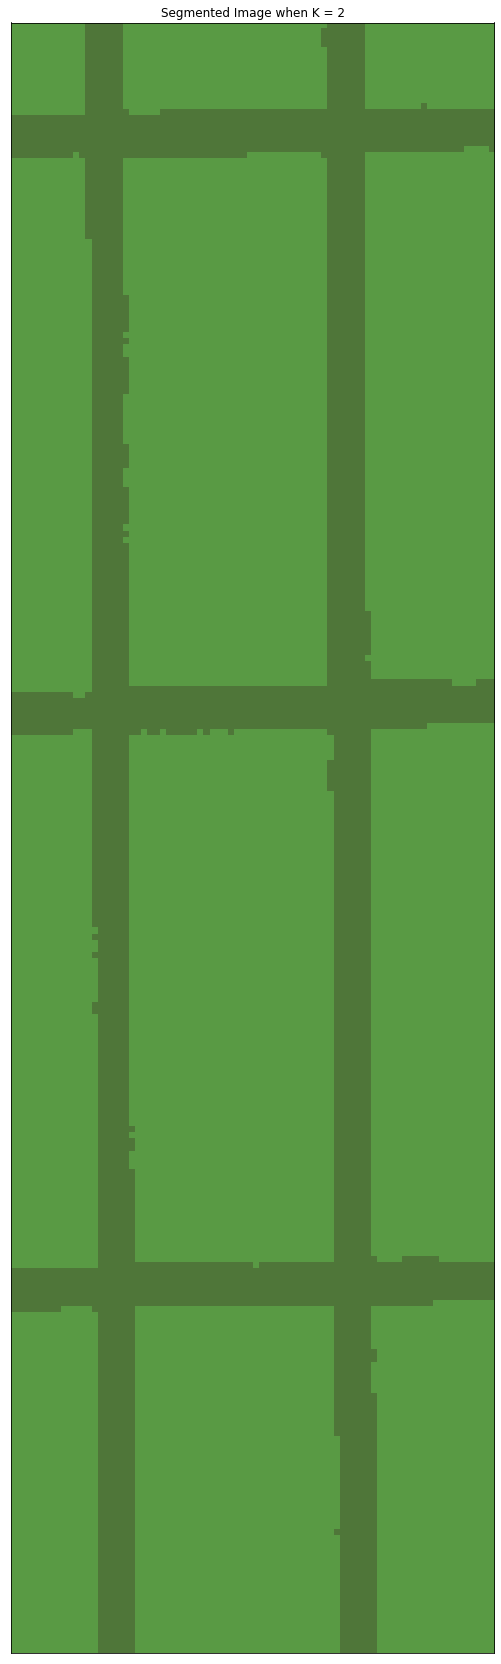

In [57]:
figure_size = 30
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,2), plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

plot_kmeans = result_image

# Canny Edge Detection

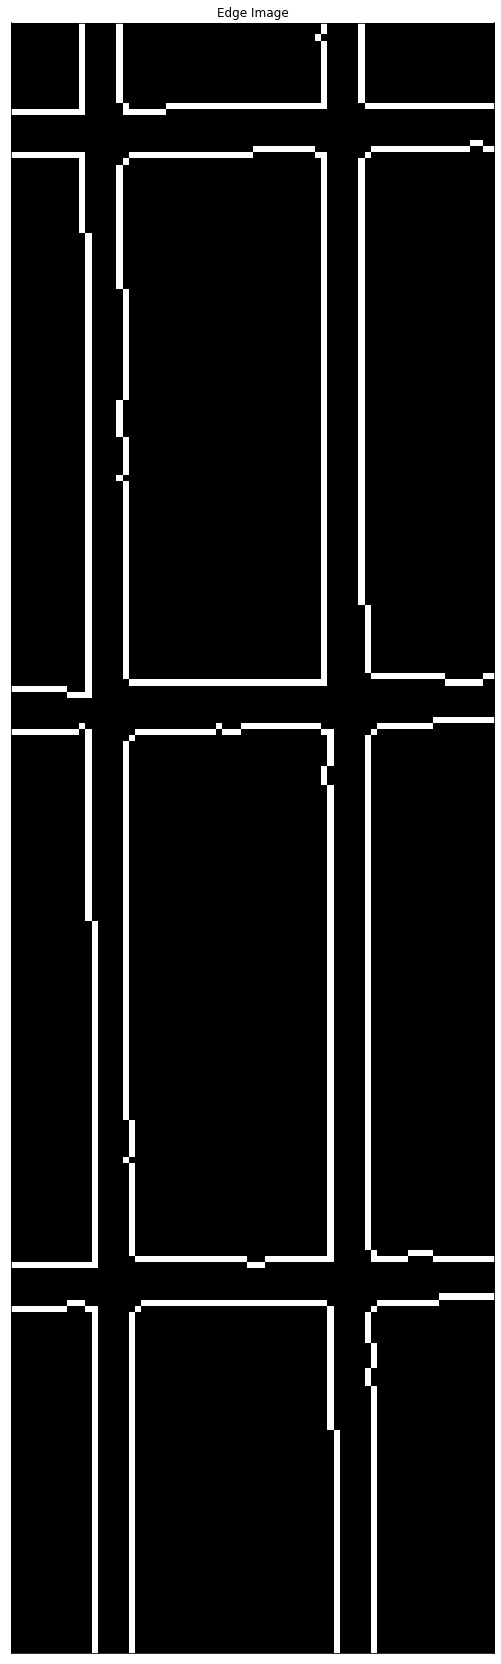

In [58]:
edges = cv2.Canny(result_image, 70, 200)
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

plot_canny = edges

In [34]:
# restore original size
#width = int(img.shape[1] * scale_percent)
#height = int(img.shape[0] * scale_percent)
#dim = (width, height)

#plot_kmeans = cv2.resize(plot_kmeans, dim, interpolation = cv2.INTER_AREA)
#plot_kmeans = cv2.cvtColor(plot_kmeans, cv2.COLOR_RGB2BGR)

#plot_canny = cv2.resize(plot_canny, dim, interpolation = cv2.INTER_AREA)

#cv2.imwrite('kmeans.bmp', plot_kmeans)
#cv2.imwrite('canny.bmp', plot_canny)

True